In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
insurance = pd.read_csv("./insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [28]:
age = insurance['age'].values
bmi = insurance['bmi'].values
children = insurance['children'].values
charges = insurance['charges'].values
bmi

array([27.9 , 33.77, 33.  , ..., 36.85, 25.8 , 29.07])

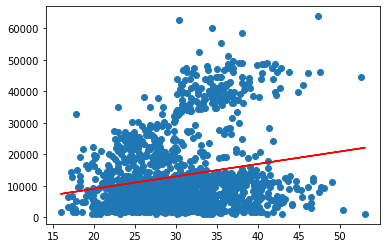

In [29]:
bmi_vector = bmi.reshape(-1,1)
model = LinearRegression().fit(bmi_vector, charges)
prediction = model.predict(bmi_vector)
plt.scatter(bmi, charges)
plt.plot(bmi, prediction, color='red')
plt.show()

## this is a really odd chart below. why do we see basically 3 trend lines when comparing age to insurance charges?

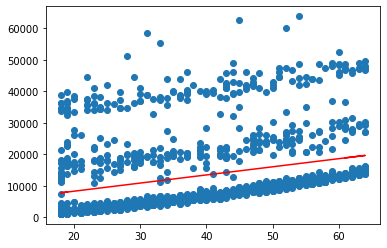

In [30]:
age_vector = age.reshape(-1,1)
model = LinearRegression().fit(age_vector, charges)
prediction = model.predict(age_vector)
plt.scatter(age, charges)
plt.plot(age, prediction, color='red')
plt.show()

In [31]:
non_smokers = insurance[insurance['smoker'] == 'no']
smokers = insurance[insurance['smoker'] == 'yes']

In [32]:
smokers_bmi = smokers['bmi'].values
non_smokers_bmi = non_smokers['bmi'].values
smokers_age = smokers['age'].values
non_smokers_age = non_smokers['age'].values
smokers_charges = smokers['charges'].values
non_smokers_charges = non_smokers['charges'].values

## after a bit of goofing around, i stumbled into this, which is the same graphic, but separates out the smokers from the non-smokers, interesting!

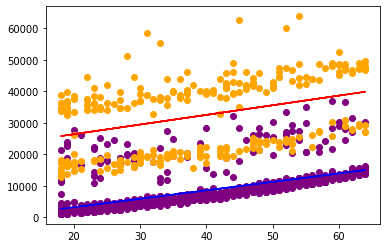

In [33]:
non_smokers_age_vector = non_smokers_age.reshape(-1,1)
model = LinearRegression().fit(non_smokers_age_vector, non_smokers_charges)
prediction = model.predict(non_smokers_age_vector)
plt.scatter(non_smokers_age, non_smokers_charges, color='purple')
plt.plot(non_smokers_age, prediction, color='blue')

smokers_age_vector = smokers_age.reshape(-1,1)
model = LinearRegression().fit(smokers_age_vector, smokers_charges)
prediction = model.predict(smokers_age_vector)
plt.scatter(smokers_age, smokers_charges, color='orange')
plt.plot(smokers_age, prediction, color='red')
plt.show()

In [34]:
female_smokers = smokers[smokers['sex'] == 'female']
male_smokers = smokers[smokers['sex'] == 'male']

female_smokers_age = female_smokers['age'].values
male_smokers_age = male_smokers['age'].values
female_smokers_charges = female_smokers['charges'].values
male_smokers_charges = male_smokers['charges'].values
female_smokers_bmi = female_smokers['bmi'].values
male_smokers_bmi = male_smokers['bmi'].values

## Because there is such a wild split, i thought maybe we'd be able to see some sort of gender bias for male vs female smokers? but no...

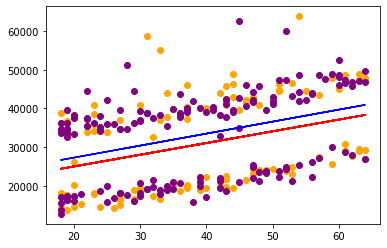

In [35]:
female_smokers_age_vector = female_smokers_age.reshape(-1,1)
model = LinearRegression().fit(female_smokers_age_vector, female_smokers_charges)
prediction = model.predict(female_smokers_age_vector)
plt.scatter(female_smokers_age, female_smokers_charges, color='orange')
plt.plot(female_smokers_age, prediction, color='red')

male_smokers_age_vector = male_smokers_age.reshape(-1,1)
model = LinearRegression().fit(male_smokers_age_vector, male_smokers_charges)
prediction = model.predict(male_smokers_age_vector)
plt.scatter(male_smokers_age, male_smokers_charges, color='purple')
plt.plot(male_smokers_age, prediction, color='blue')
plt.show()

In [36]:
X = non_smokers_age.reshape(-1,1)
y = non_smokers_charges
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2, random_state=None)

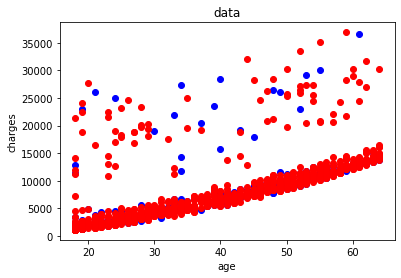

In [37]:
%matplotlib inline
plt.scatter(x_test,y_test,color='blue')
plt.scatter(x_train,y_train,color='red')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('data')
plt.show()

## Onto the training/testing data split!

In [38]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Training accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Testing accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Training accuracy 41.79 %
Testing accuracy 30.31 %


In [39]:
X = smokers_age.reshape(-1,1)
y = smokers_charges
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2, random_state=None)

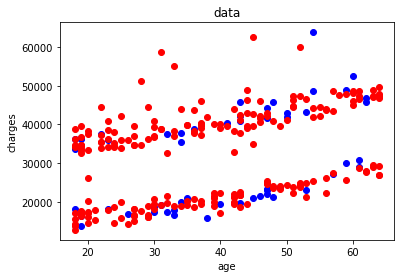

In [40]:
%matplotlib inline
plt.scatter(x_test,y_test,color='blue')
plt.scatter(x_train,y_train,color='red')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('data')
plt.show()

In [41]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Training accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Testing accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Training accuracy 12.94 %
Testing accuracy 15.03 %


## Some conlusions:

1. Being a smoker definitely increases your health risk, according to insurance costs
1. Being a male vs female smoker does not explain that wild chasm we saw above, I bet there is some sort of relationship, but I cannot sort it out.
1. Non-smokers have much more predictiable costs than smokers... probably because of more extreme health outcomes

P.S. I changed the random number selector to None, so that we'd get different results every time we run this notebook regarding the training and testing data.